# GROUP 22 - PRT 564 - ASSIGNMENT 2
## SEM 1, 2024

- Linh Chi Doan​ - S364721​
- Hong Trang Doan​ - S365638​
- Hai Vu​ - S362531​
- Zimu Su​ - S361640​

## Objective 1: Explore any actionable trends
Steps:
1. Pre-processing & Cleaning data
2. Relevant trends (obvious trends)
2. Explore Interesting trends (not obvious trends)

In [1]:
# Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
# Load the CSV file
file_path = 'retractions35215.csv'
data = pd.read_csv(file_path)
# data.head()

### 1. Pre-processing & Cleaning data

In [3]:
# Checking data types and number of null values in each column
data_info = data.info()
null_counts = data.isnull().sum()
# null_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35215 entries, 0 to 35214
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              35215 non-null  int64  
 1   Title                  35215 non-null  object 
 2   Subject                35215 non-null  object 
 3   Institution            35214 non-null  object 
 4   Journal                35215 non-null  object 
 5   Publisher              35215 non-null  object 
 6   Country                35215 non-null  object 
 7   Author                 35215 non-null  object 
 8   URLS                   19961 non-null  object 
 9   ArticleType            35215 non-null  object 
 10  RetractionDate         35215 non-null  object 
 11  RetractionDOI          35009 non-null  object 
 12  RetractionPubMedID     32656 non-null  float64
 13  OriginalPaperDate      35215 non-null  object 
 14  OriginalPaperDOI       35215 non-null  object 
 15  Or

In [4]:
# Fill missing values for 'Institution' with 'Unknown' and 'Paywalled' with mode (most common value)
data['Institution'].fillna('Unknown', inplace=True)
data['Paywalled'].fillna(data['Paywalled'].mode()[0], inplace=True)

# Convert 'RetractionDate' and 'OriginalPaperDate' to datetime format
data['RetractionDate'] = pd.to_datetime(data['RetractionDate'], errors='coerce')
data['OriginalPaperDate'] = pd.to_datetime(data['OriginalPaperDate'], errors='coerce')

# Check the transformations and fillings
data[['Institution', 'Paywalled', 'RetractionDate', 'OriginalPaperDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35215 entries, 0 to 35214
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Institution        35215 non-null  object        
 1   Paywalled          35215 non-null  object        
 2   RetractionDate     14515 non-null  datetime64[ns]
 3   OriginalPaperDate  16505 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.1+ MB


In [5]:
# # Check unique values in some categorical columns for inconsistencies
# unique_values = {
#     "Subject": data['Subject'].unique(),
#     "Country": data['Country'].unique(),
#     "ArticleType": data['ArticleType'].unique(),
#     "RetractionNature": data['RetractionNature'].unique()
# }
# unique_values


# Splitting 'Subject' and 'Country' columns into lists
data['Subject'] = data['Subject'].apply(lambda x: x.split(';') if pd.notnull(x) else [])
data['Country'] = data['Country'].apply(lambda x: x.split(';') if pd.notnull(x) else [])

# Remove trailing semicolons and split the ArticleType into lists
data['ArticleType'] = data['ArticleType'].apply(lambda x: x.strip(';').split(';'))

# Show example entries after modification
# data['ArticleType'].head()

### 2. Explore Relevant trends (obvious trend)
#### 2.1 Number of Retractions Over the Years
Examine the trend of retractions over the years to see if there's an increase or specific periods with high numbers of retractions.

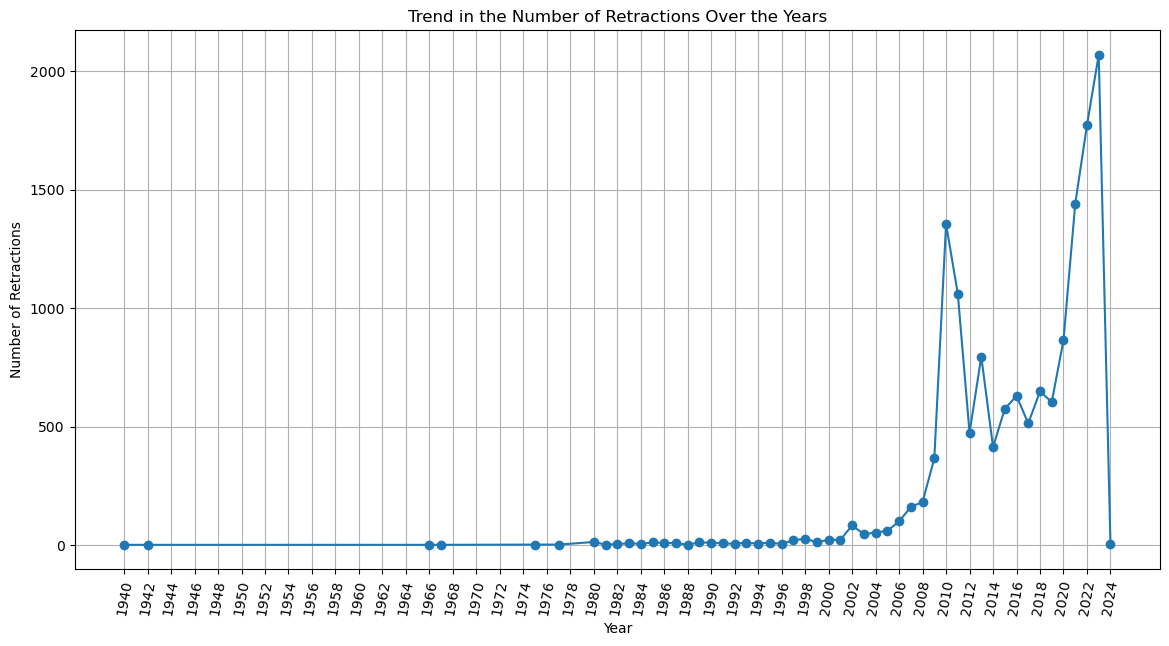

In [5]:
# Extract year from 'RetractionDate' if not already extracted
if 'RetractionYear' not in data.columns:
    data['RetractionYear'] = data['RetractionDate'].dt.year

# Count the number of retractions per year
retractions_per_year = data['RetractionYear'].value_counts().sort_index()

# Plotting the trend of retractions over the years with more detailed x-axis
plt.figure(figsize=(14, 7))
plt.plot(retractions_per_year.index, retractions_per_year.values, marker='o', linestyle='-')
plt.title('Trend in the Number of Retractions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Retractions')
plt.grid(True)

# Ensuring start and end years are integers
start_year = int(retractions_per_year.index.min())
end_year = int(retractions_per_year.index.max())

# Setting x-axis ticks to show every 2 years from the earliest to the latest in the data
plt.xticks(range(start_year, end_year + 1, 2), rotation=80)

plt.show()


#### Key findings:
- Peak Retractions: The year with the most retractions was 2023, with a total of 6,034 retractions.
- Lowest Retractions: The year with the fewest retractions was 1940, with only 1 retraction recorded.
- Growth Trends: The dataset shows significant spikes in certain years. For example, from 2020 to 2023, there was a consistent increase in retractions, reaching a peak in 2023.

#### 2.2 Top Subject Areas for Retractions
Identify which fields of study are most likely to have retracted papers.

In [8]:
# Extract subjects in text
def extract_subjects_safe(subject_entry):
    if isinstance(subject_entry, list):        
        return subject_entry
    elif isinstance(subject_entry, str):        
        return re.findall(r"'([^']*)'", subject_entry)
    else:        
        return []

# Apply function to each row in the 'Subject' column and flatten the list
subject_list_safe = [subject for sublist in data['Subject'].apply(extract_subjects_safe) for subject in sublist]

# Count the occurrences of each subject
subject_counts_safe = Counter(subject_list_safe)

# Convert to DataFrame for better visualization and sort by frequency
subject_counts_df_safe = pd.DataFrame(subject_counts_safe.items(), columns=['Subject', 'Count']).sort_values(by='Count', ascending=False)
subject_counts_df_safe.head(10)

,Subject,Count
2,,35215
23,(BLS) Biology - Cellular,7655
22,(BLS) Genetics,5081
9,(B/T) Technology,4969
10,(BLS) Biochemistry,4454
8,(B/T) Computer Science,4251
21,(BLS) Biology - Cancer,4168
34,(BLS) Biology - Molecular,3027
38,(SOC) Education,2531
42,(HSC) Medicine - Oncology,2045


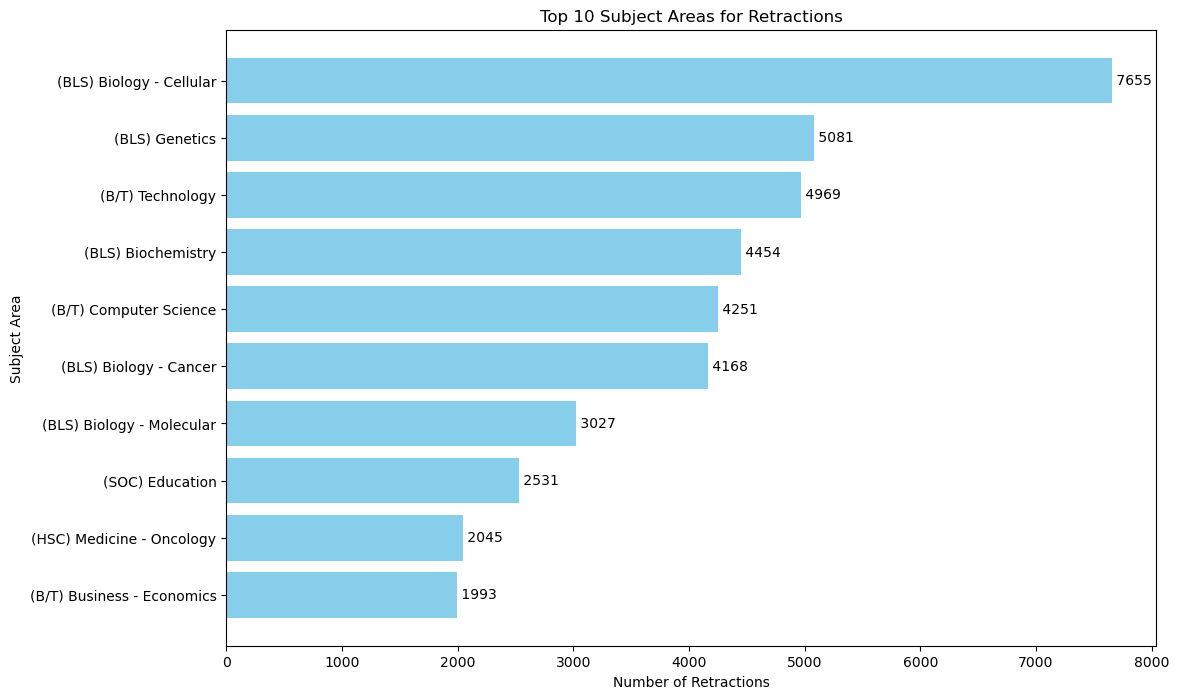

In [9]:
# Remove the empty entries
filtered_subject_counts = {subject: count for subject, count in subject_counts_safe.items() if subject}

# Create a DataFrame from the filtered counts
filtered_subject_counts_df = pd.DataFrame(list(filtered_subject_counts.items()), columns=['Subject', 'Count']).sort_values(by='Count', ascending=False)

# Plotting the top subject areas
plt.figure(figsize=(12, 8))
bars_subjects = plt.barh(filtered_subject_counts_df['Subject'][:10], filtered_subject_counts_df['Count'][:10], color='skyblue')
plt.xlabel('Number of Retractions')
plt.ylabel('Subject Area')
plt.title('Top 10 Subject Areas for Retractions')
plt.gca().invert_yaxis()

# Show the number of retractions
for bar in bars_subjects:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.show()

#### 2.3 Top Journals/ Institutions/ Publishers with high rate of retraction

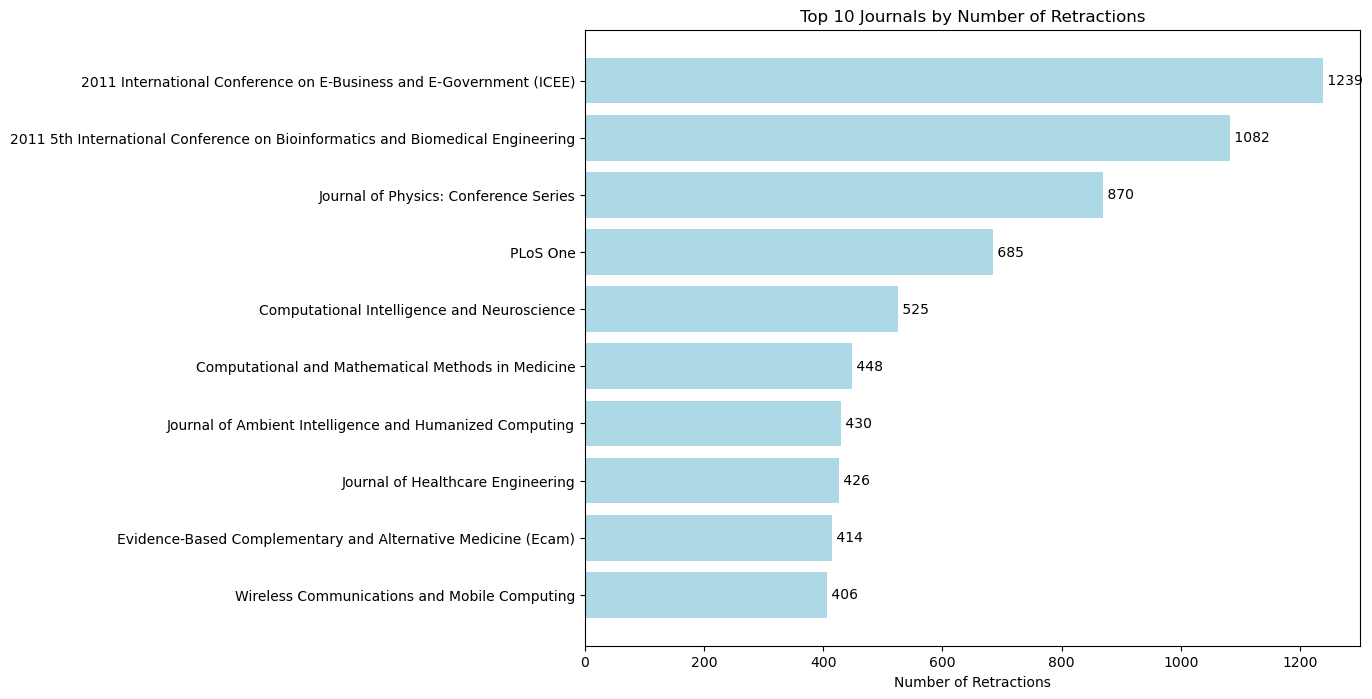

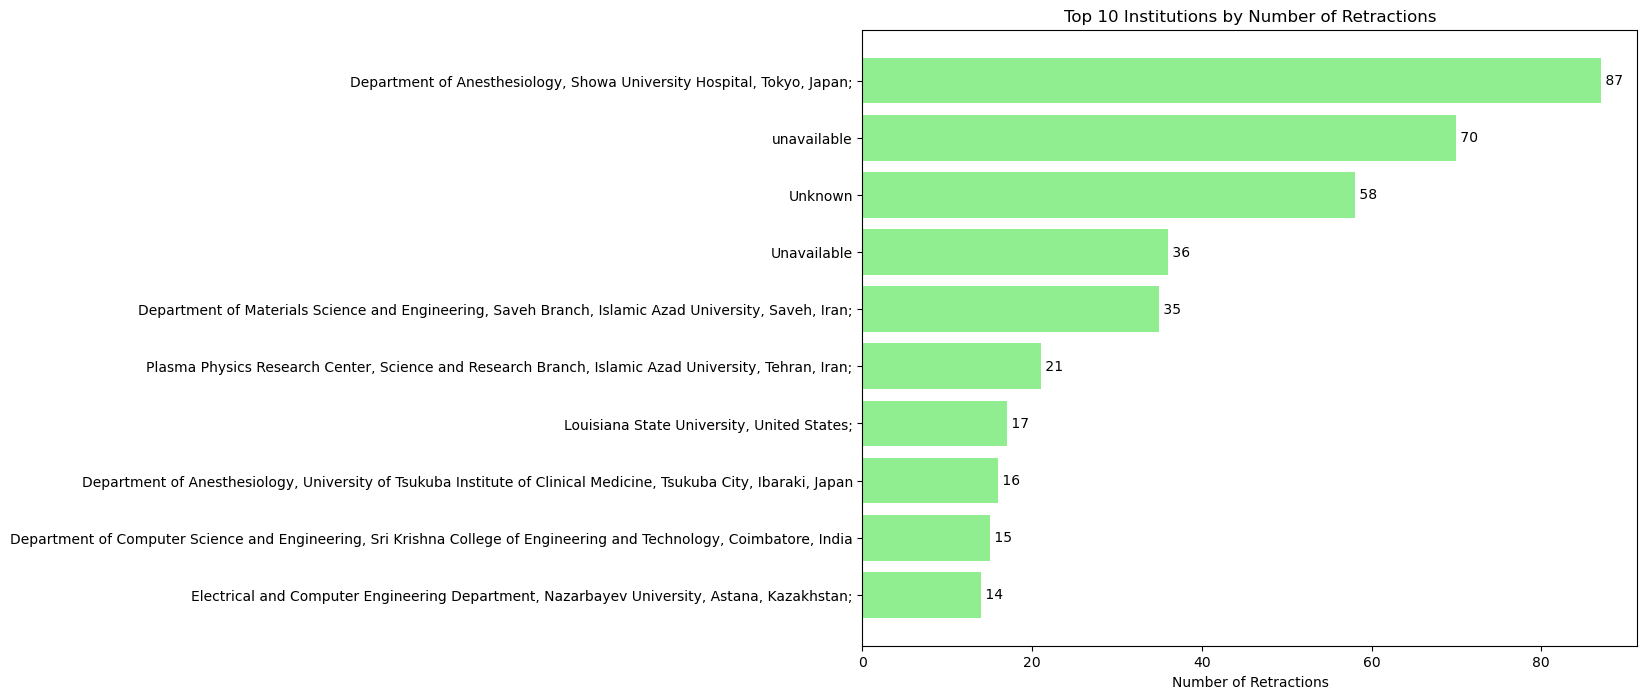

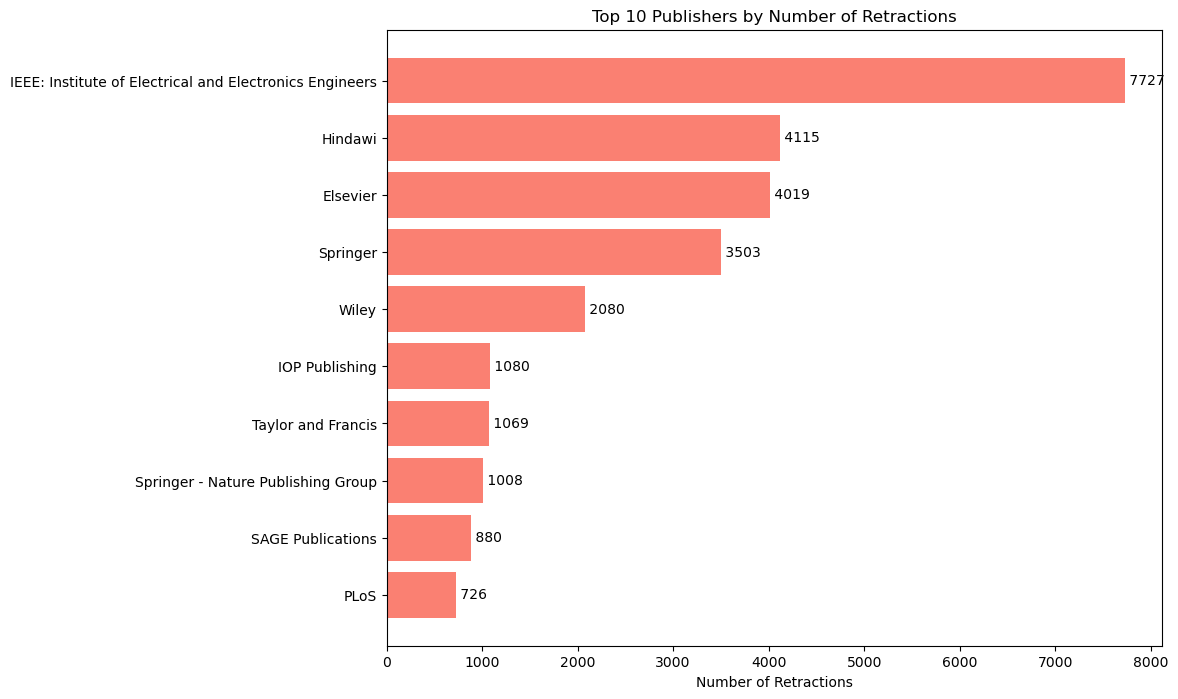

In [10]:
# Counting occurrences for Journals, Institutions, and Publishers
top_journals = data['Journal'].value_counts().head(10)
top_institutions = data['Institution'].value_counts().head(10)
top_publishers = data['Publisher'].value_counts().head(10)

# Visualization of the top Journals by number of retractions with numbers
plt.figure(figsize=(10, 8))
bars_journal = plt.barh(top_journals.index, top_journals.values, color='lightblue')
plt.title('Top 10 Journals by Number of Retractions')
plt.xlabel('Number of Retractions')
plt.gca().invert_yaxis() 

# Show each bar with the number of retractions
for bar in bars_journal:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.show()


# Visual all 3 top Journals, Institutions, and Publishers

# top Institutions by number of retractions
plt.figure(figsize=(10, 8))
bars_institution = plt.barh(top_institutions.index, top_institutions.values, color='lightgreen')
plt.title('Top 10 Institutions by Number of Retractions')
plt.xlabel('Number of Retractions')
plt.gca().invert_yaxis()  # Invert to have the highest at the top

for bar in bars_institution:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.show()


# top Publishers by number of retractions with numbers
plt.figure(figsize=(10, 8))
bars_publisher = plt.barh(top_publishers.index, top_publishers.values, color='salmon')
plt.title('Top 10 Publishers by Number of Retractions')
plt.xlabel('Number of Retractions')
plt.gca().invert_yaxis() 

for bar in bars_publisher:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.show()

#### 2.4 Geographical Distribution of Retractions
Look into the country or countries most associated with retracted papers to identify if certain regions are more prone to retractions.

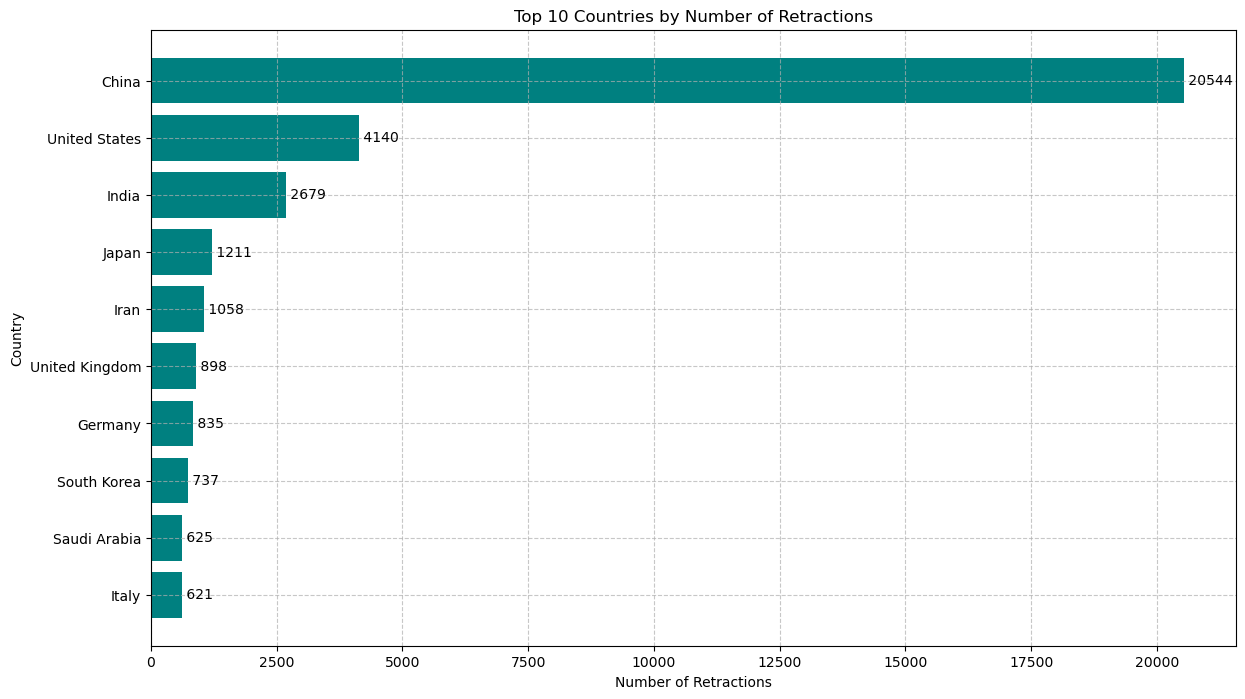

In [19]:
# Extract countries with text
def extract_countries(country_entry):
    if isinstance(country_entry, list):       
        return country_entry
    elif isinstance(country_entry, str):        
        return re.findall(r"'([^']*)'", country_entry)
    else:        
        return []

# Apply the adjusted function to each row in the 'Country' column and flatten the list
country_list_safe = [country for sublist in data['Country'].apply(extract_countries) for country in sublist]

# Count the occurrences of each country again
country_counts_safe = Counter(country_list_safe)

# Convert to DataFrame for better visualization and sort by frequency
country_counts_df_safe = pd.DataFrame(country_counts_safe.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 10 countries by retraction counts, and prepare for visualization
country_counts_df_safe.head(10)

# Visualization of the geographical distribution of retractions, corrected
plt.figure(figsize=(14, 8))
bars = plt.barh(country_counts_df_safe['Country'][:10], country_counts_df_safe['Count'][:10], color='teal')
plt.title('Top 10 Countries by Number of Retractions')
plt.xlabel('Number of Retractions')
plt.ylabel('Country')
plt.gca().invert_yaxis()  
plt.grid(True, linestyle='--', alpha=0.7) 

# Adding text annotations for each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.show()

#### 2.5 Most common article types retracted

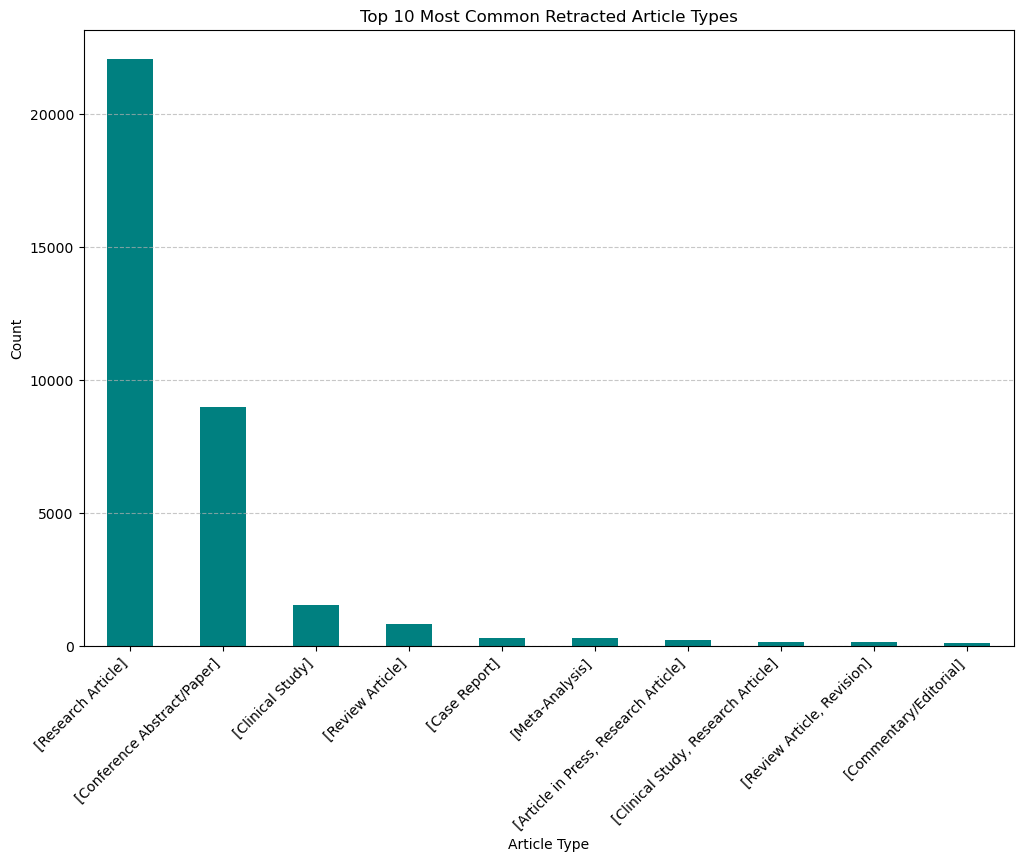

In [6]:
# Count the occurrences of each article type
article_type_counts = data['ArticleType'].value_counts()

# Plotting only the top 10 most frequent article types
top_10_article_types = article_type_counts.head(10)

plt.figure(figsize=(12, 8))
top_10_article_types.plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Retracted Article Types')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Explore Interesting trends (not obvious trends)

### 2.1 Common reasons for retractions
Analyze the reasons for retraction to identify the most common factors leading to retractions. Then put them into a group.

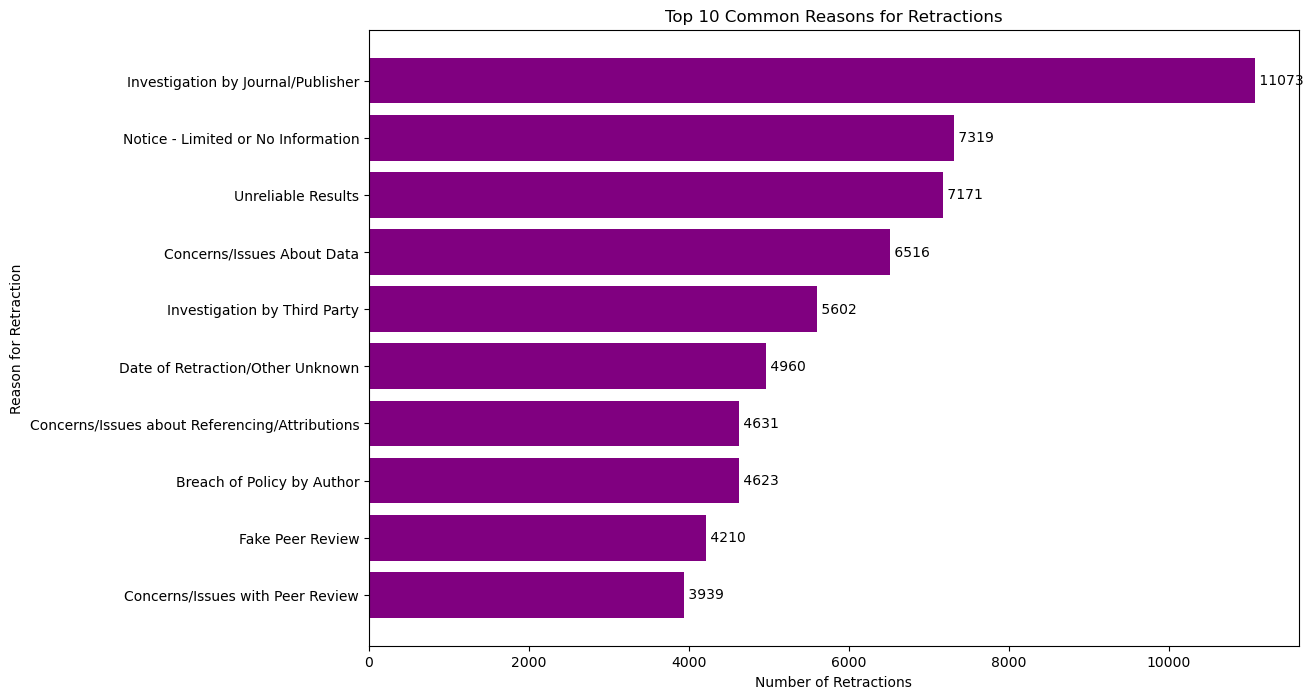

In [12]:
from collections import Counter

# Function to extract reasons from the string format
def extract_reasons(reason_string):
    # Splitting the string by semicolon and stripping any leading/trailing characters
    reasons = [reason.strip() for reason in reason_string.split(';') if reason.strip()]
    return reasons

# Apply the function to each row in the 'Reason' column and flatten the list of reasons
reason_list = [reason for sublist in data['Reason'].dropna().apply(extract_reasons) for reason in sublist]

# Count the occurrences of each reason
reason_counts = Counter(reason_list)

# Convert to DataFrame for better visualization and sort by frequency
reason_counts_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count']).sort_values(by='Count', ascending=False)

# Removing '+' from the reasons
reason_counts_df['Reason'] = reason_counts_df['Reason'].apply(lambda x: x.strip('+'))

# Visualization of the common reasons for retractions with numbers
plt.figure(figsize=(12, 8))
bars_reasons = plt.barh(reason_counts_df['Reason'][:10], reason_counts_df['Count'][:10], color='purple')
plt.title('Top 10 Common Reasons for Retractions')
plt.xlabel('Number of Retractions')
plt.ylabel('Reason for Retraction')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top

# Annotate each bar with the number of retractions
for bar in bars_reasons:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.show()


### Categorise reasons into groups
Based on nature of reasons, we divide them into groups as follows.

1. Ethical and Legal Issues
Ethical Violations by Author
Lack of IRB/IACUC Approval
Informed/Patient Consent - None/Withdrawn
Legal Reasons/Legal Threats
Criminal Proceedings
Civil Proceedings
False/Forged Authorship
Falsification/Fabrication of Data/Image/Results
Unethical Experimentation
Copyright Claims
Conflict of Interest
Sabotage of Materials

2. Data and Research Integrity
Concerns/Issues About Data/Results/Image/Authorship
Unreliable Data/Results/Image
Error in Data/Results/Analyses/Methods/Image/Text/Materials (General)
Manipulation of Images/Results
Plagiarism of Article/Text/Data
Duplication of Article/Data/Image
Results Not Reproducible
Original Data not Provided
Randomly Generated Content
Paper Mill
Salami Slicing
Contamination of Cell Lines/Tissues/Materials (General)/Reagents

3. Publication and Peer Review Process
Investigation by Journal/Publisher/Company/Institution/Third Party/ORI
Misconduct - Official Investigation/Finding by Author/Third Party/Company/Institution
Fake Peer Review
Concerns/Issues with Peer Review
Breach of Policy by Author
Rogue Editor
Notice - Limited or No Information/Unable to Access via current resources
Withdrawal
Duplicate Publication through Error by Journal/Publisher
Error by Journal/Publisher/Third Party
Publishing Ban

4. Authorship and Attribution Issues
Concerns/Issues about Referencing/Attributions
Author Unresponsive
False Affiliation
Lack of Approval from Author/Third Party/Company/Institution
Miscommunication by Author/Journal/Publisher/Third Party/Company/Institution
Objections by Author(s)/Third Party/Company/Institution

5. Miscellaneous
Date of Retraction/Other Unknown
Withdrawn (out of date)
Upgrade/Update of Prior Notice
Taken from Dissertation/Thesis
Doing the Right Thing
Notice - Lack of
Temporary Removal
Updated to Retraction
Updated to Correction
Transfer of Copyright/Ownership
Hoax Paper
Nonpayment of Fees/Refusal to Pay
Not Presented at Conference
Cites Retracted Work
Complaints about Author/Third Party/Company/Institution

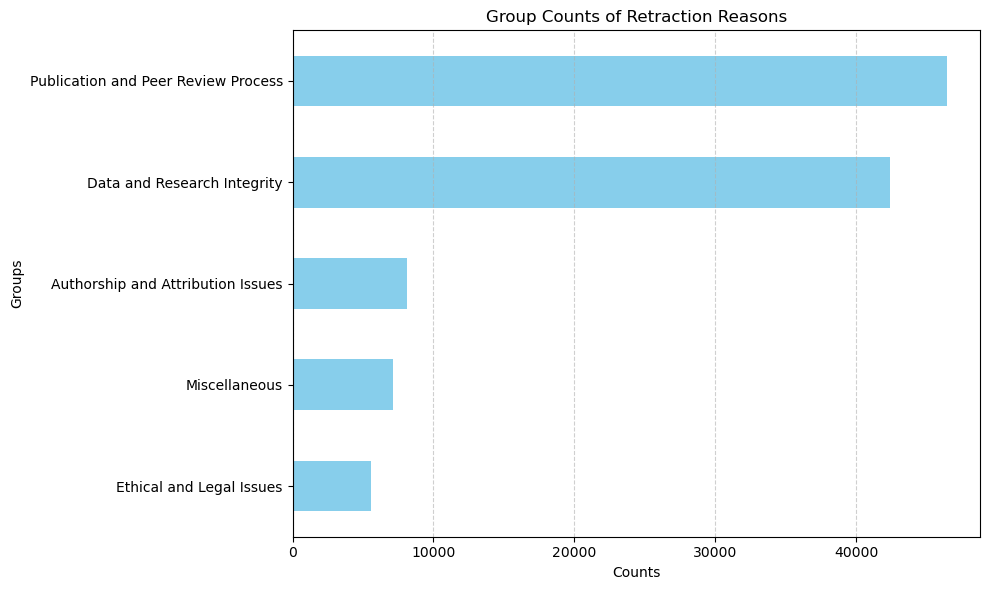

In [15]:
# Define the group mappings based on the categories provided earlier
group_mappings = {
    "Ethical and Legal Issues": [
        "Ethical Violations by Author", "Lack of IRB/IACUC Approval", "Informed/Patient Consent - None/Withdrawn",
        "Legal Reasons/Legal Threats", "Criminal Proceedings", "Civil Proceedings", "False/Forged Authorship",
        "Falsification/Fabrication of Data", "Falsification/Fabrication of Image", "Falsification/Fabrication of Results",
        "Unethical Experimentation", "Copyright Claims", "Conflict of Interest", "Sabotage of Materials"
    ],
    "Data and Research Integrity": [
        "Concerns/Issues About Data", "Concerns/Issues About Results", "Concerns/Issues About Image", 
        "Concerns/Issues About Authorship", "Unreliable Data", "Unreliable Results", "Unreliable Image", 
        "Error in Data", "Error in Results and/or Conclusions", "Error in Analyses", "Error in Methods", 
        "Error in Image", "Error in Text", "Manipulation of Images", "Manipulation of Results", 
        "Plagiarism of Article", "Plagiarism of Text", "Plagiarism of Data", "Duplication of Article", 
        "Duplication of Data", "Duplication of Image", "Results Not Reproducible", "Original Data not Provided", 
        "Randomly Generated Content", "Paper Mill", "Salami Slicing", "Contamination of Cell Lines/Tissues", 
        "Contamination of Materials (General)", "Contamination of Reagents"
    ],
    "Publication and Peer Review Process": [
        "Investigation by Journal/Publisher", "Investigation by Company/Institution", "Investigation by Third Party", 
        "Investigation by ORI", "Misconduct - Official Investigation/Finding", "Misconduct by Author", 
        "Misconduct by Third Party", "Misconduct by Company/Institution", "Fake Peer Review", "Concerns/Issues with Peer Review", 
        "Breach of Policy by Author", "Rogue Editor", "Notice - Limited or No Information", "Notice - Unable to Access via current resources",
        "Withdrawal", "Duplicate Publication through Error by Journal/Publisher", "Error by Journal/Publisher", 
        "Error by Third Party", "Publishing Ban"
    ],
    "Authorship and Attribution Issues": [
        "Concerns/Issues about Referencing/Attributions", "Author Unresponsive", "False Affiliation", 
        "Lack of Approval from Author", "Lack of Approval from Third Party", "Lack of Approval from Company/Institution",
        "Miscommunication by Author", "Miscommunication by Journal/Publisher", "Miscommunication by Third Party", 
        "Miscommunication by Company/Institution", "Objections by Author(s)", "Objections by Third Party", "Objections by Company/Institution"
    ],
    "Miscellaneous": [
        "Date of Retraction/Other Unknown", "Withdrawn (out of date)", "Upgrade/Update of Prior Notice", 
        "Taken from Dissertation/Thesis", "Doing the Right Thing", "Notice - Lack of", "Temporary Removal", 
        "Updated to Retraction", "Updated to Correction", "Transfer of Copyright/Ownership", "Hoax Paper", 
        "Nonpayment of Fees/Refusal to Pay", "Not Presented at Conference", "Cites Retracted Work", 
        "Complaints about Author", "Complaints about Third Party", "Complaints about Company/Institution"
    ]
}

# Reverse the dictionary to map reasons to groups
reason_to_group = {reason: group for group, reasons in group_mappings.items() for reason in reasons}

# Strip '+' from the reasons in the dataset and split by semicolon
data['Cleaned_Reason'] = data['Reason'].str.replace('+', '').str.split(';')

# Create a separate DataFrame for reason expansion and mapping
expanded_reasons = data['Cleaned_Reason'].explode().str.strip().reset_index()
expanded_reasons['Group'] = expanded_reasons['Cleaned_Reason'].map(reason_to_group)

# Count the occurrences of each group
group_counts = expanded_reasons['Group'].value_counts()

# Display the counts
group_counts

# Visualization of the group counts
plt.figure(figsize=(10, 6))
group_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Group Counts of Retraction Reasons')
plt.xlabel('Counts')
plt.ylabel('Groups')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 2.2 Retraction Duration
Calculate the time between the original publication date and the retraction date to see if certain subjects or journals tend to have quicker retractions.

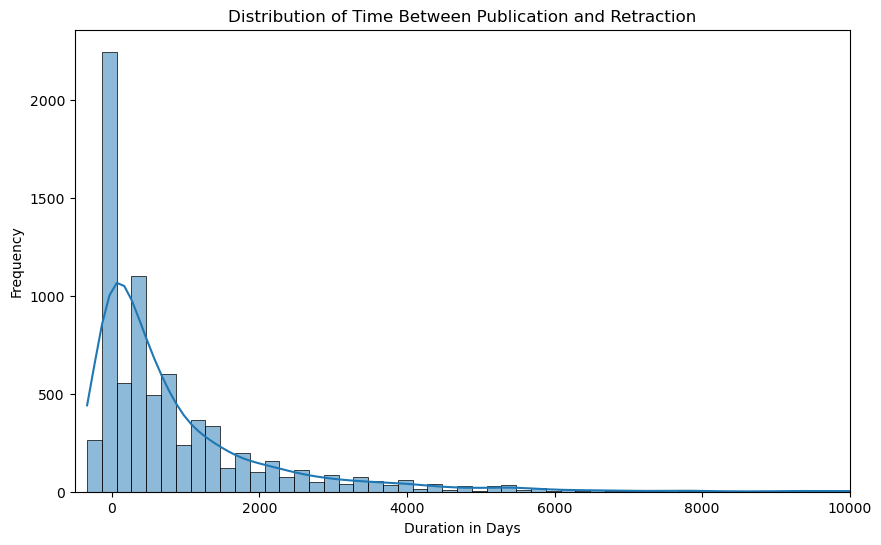

In [8]:
# Calculate the duration between publication and retraction in days
data['DurationDays'] = (data['RetractionDate'] - data['OriginalPaperDate']).dt.days

# Descriptive statistics for the duration
duration_stats = data['DurationDays'].describe()
duration_stats

# Plotting the distribution of durations, ignoring extreme outliers for visualization clarity
plt.figure(figsize=(10, 6))
sns.histplot(data['DurationDays'], bins=100, kde=True)
plt.title('Distribution of Time Between Publication and Retraction')
plt.xlabel('Duration in Days')
plt.ylabel('Frequency')
plt.xlim(-500, 10000)  # Limiting x-axis to ignore extreme outliers for better visualization
plt.show()

- Mean: On average, papers were retracted about 821 days after publication.
- 25% (First Quartile): 25% of papers were retracted within 54 days after publication.
- Median (50%): The median duration is 385 days, meaning half of the retracted papers were pulled within about a year after publication.
- 75% (Third Quartile): 75% of papers were retracted within 1,011 days (about 2.77 years).
Maximum: The longest duration before a retraction was noted as 19,716 days, which is over 54 years.

### 2.3 Number of author impacts on retraction
Investigating whether retractions are more common among papers with single authors versus those with multiple authors. This could offer insights into collaborative versus individual research dynamics.

C:\Users\vuhai\AppData\Local\Temp\ipykernel_3268\2674688371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=author_count_trend.index, y=author_count_trend.values, palette="viridis")


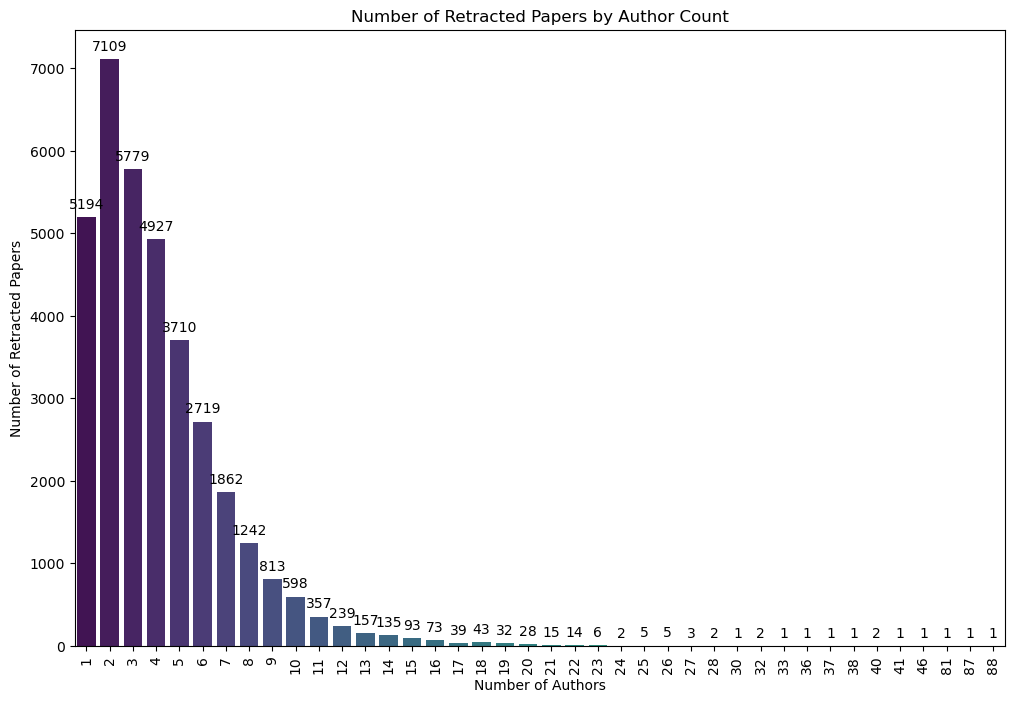

In [10]:
# Calculate the number of authors for each paper
data['AuthorCount'] = data['Author'].str.split(';').apply(lambda x: len(x) if isinstance(x, list) else 0)
author_count_trend = data['AuthorCount'].value_counts().sort_index()

# Bar plot of author counts with annotations for exact numbers
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=author_count_trend.index, y=author_count_trend.values, palette="viridis")
plt.title('Number of Retracted Papers by Author Count')
plt.xlabel('Number of Authors')
plt.ylabel('Number of Retracted Papers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


### 2.4 The retraction rate of Papers in Paywall
Investigate whether there's a correlation between papers being behind a paywall and their likelihood of retraction. 

C:\Users\vuhai\AppData\Local\Temp\ipykernel_3268\2395290035.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y='Reason', x='Count', data=top_paywalled_reasons, palette='viridis')
C:\Users\vuhai\AppData\Local\Temp\ipykernel_3268\2395290035.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y='Reason', x='Count', data=top_non_paywalled_reasons, palette='viridis')


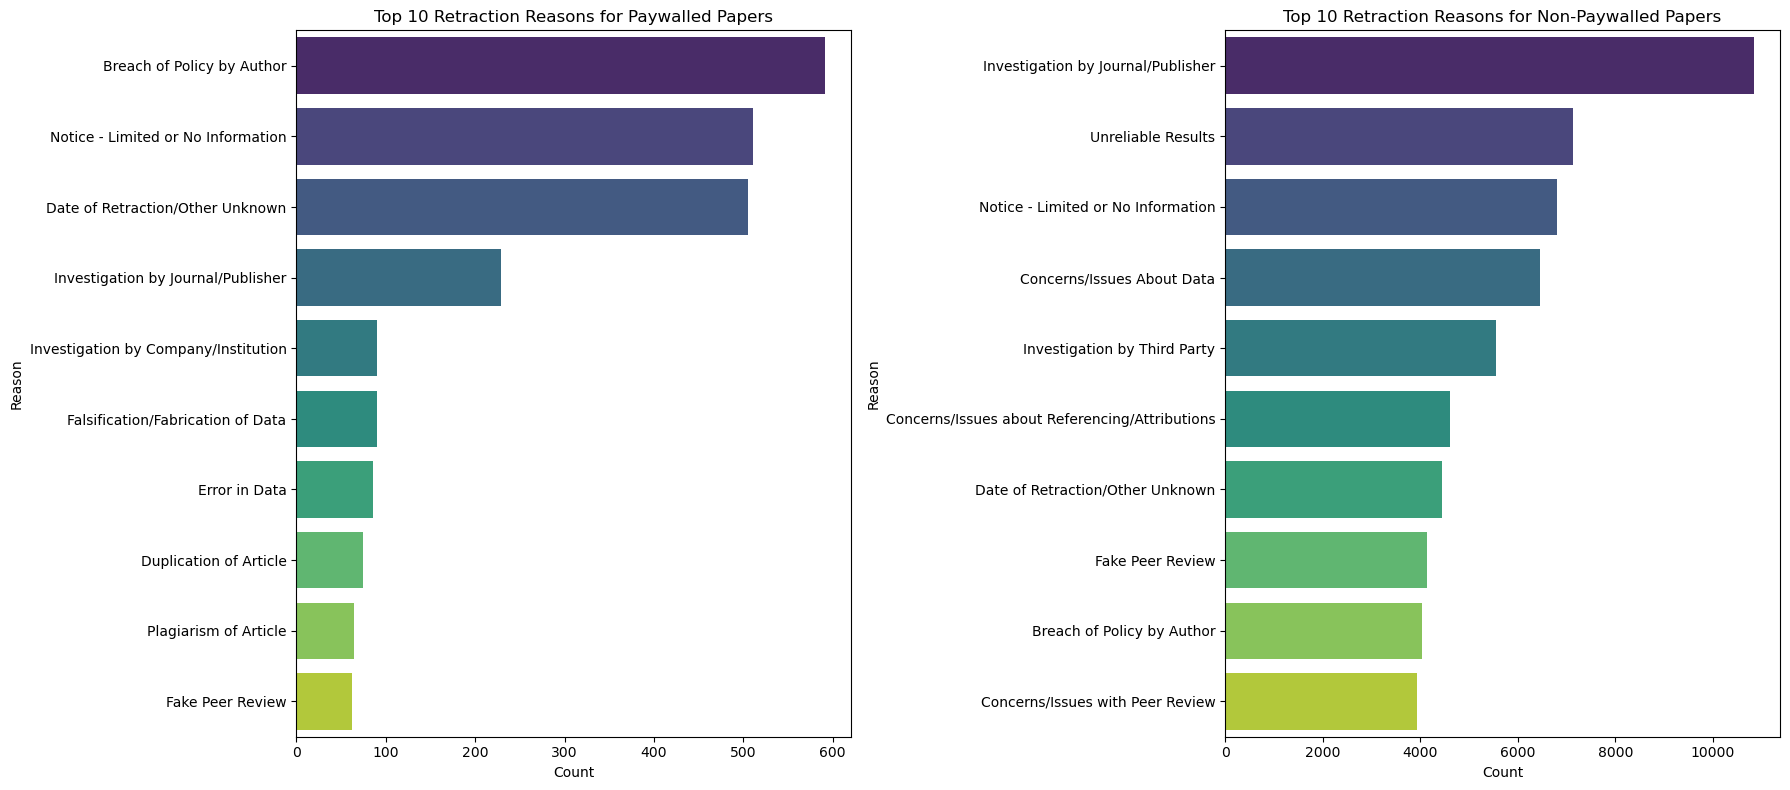

In [11]:
# Function to clean and count reasons within each paywall category
def count_reasons(data):
    reasons_list = data['Reason'].str.split(';').sum()
    reasons_list = [reason.strip('+').strip() for reason in reasons_list if reason.strip()]
    return Counter(reasons_list)

# Filter out 'Unknown' paywall status
filtered_data = data[data['Paywalled'] != 'Unknown']

# Counting reasons for each category
paywalled_reasons = count_reasons(filtered_data[filtered_data['Paywalled'] == 'Yes'])
non_paywalled_reasons = count_reasons(filtered_data[filtered_data['Paywalled'] == 'No'])

# Converting to DataFrame
paywalled_df = pd.DataFrame(list(paywalled_reasons.items()), columns=['Reason', 'Count'])
non_paywalled_df = pd.DataFrame(list(non_paywalled_reasons.items()), columns=['Reason', 'Count'])


# Sorting and preparing data for top reasons visualization
top_paywalled_reasons = paywalled_df.sort_values(by='Count', ascending=False).head(10)
top_non_paywalled_reasons = non_paywalled_df.sort_values(by='Count', ascending=False).head(10)

# Creating a subplot for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar plot for paywalled papers
sns.barplot(ax=axes[0], y='Reason', x='Count', data=top_paywalled_reasons, palette='viridis')
axes[0].set_title('Top 10 Retraction Reasons for Paywalled Papers')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Reason')

# Bar plot for non-paywalled papers
sns.barplot(ax=axes[1], y='Reason', x='Count', data=top_non_paywalled_reasons, palette='viridis')
axes[1].set_title('Top 10 Retraction Reasons for Non-Paywalled Papers')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Reason')

plt.tight_layout()
plt.show()


### 2.5 Numbers of paywalled vs non-paywalled papers

C:\Users\vuhai\AppData\Local\Temp\ipykernel_3268\2168862002.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Paywall Status', y='Total Retractions', data=paywall_status_counts, palette='pastel')


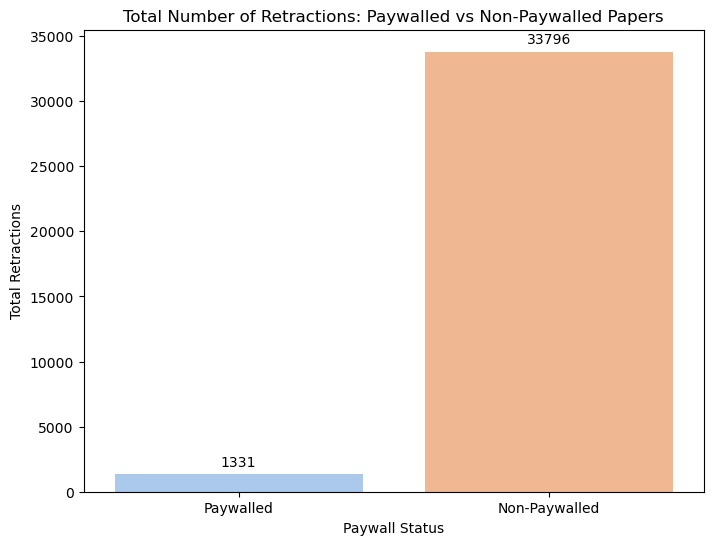

In [13]:
# Calculating total retracted papers for paywalled and non-paywalled
total_paywalled = filtered_data[filtered_data['Paywalled'] == 'Yes'].shape[0]
total_non_paywalled = filtered_data[filtered_data['Paywalled'] == 'No'].shape[0]

# Preparing data for visualization
paywall_status_counts = pd.DataFrame({
    'Paywall Status': ['Paywalled', 'Non-Paywalled'],
    'Total Retractions': [total_paywalled, total_non_paywalled]
})

# Bar plot for total retractions by paywall status with annotations for exact numbers
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Paywall Status', y='Total Retractions', data=paywall_status_counts, palette='pastel')
plt.title('Total Number of Retractions: Paywalled vs Non-Paywalled Papers')
plt.xlabel('Paywall Status')
plt.ylabel('Total Retractions')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()